In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [6]:
# read in the iris data
iris = load_iris()

# Create X(features) and y(response)
X = iris.data
y = iris.target

In [13]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check the accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.973684210526


In [16]:
#simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds = 5, shuffle = False)
# print the contents of each training and testing set
print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [17]:
# Cross-validation example: parameter tuning
# Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [19]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [21]:
# search for an optimum value of k for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = "accuracy")
    k_scores.append(scores.mean())
print k_scores

[0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


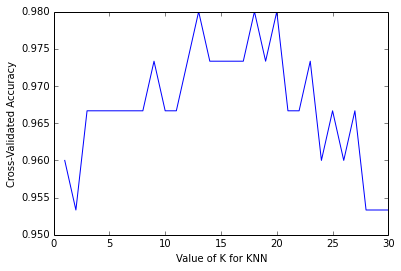

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [25]:
# Cross-validation example: model selection
# Goal: Compare the best KNN model with logistic regression on the iris dataset
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [26]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring="accuracy").mean()

0.953333333333


In [27]:
# Cross-validation example: feature selection
# Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [28]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [29]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

In [30]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring="mean_squared_error")
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [31]:
# fix the sign of MSE scores
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [32]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [33]:
# calculate the average RMSE
print rmse_scores.mean()

1.69135317081


In [34]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean()

1.67967484191
